# Notebook to reproduce fig. 6 of the DEXP manuscript

In [1]:
# my own functions
import lib.dEXP as dEXP #all functions for potential field transformation and ridges analysis
import lib.plot_dEXP as pEXP #all functions for representation

import pickle

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
from mpl_axes_aligner import align


E:\Padova\Software\SourceInversion\Potential_field_imaging\dEXP_imaging\fatiando\vis\mpl.py:69: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "matplotlib.pyplot module directly. Some of the fatiando " +


- fatiando a terra old package (only used to compute the vertical and horizontal derivatives) 
http://www.fatiando.org/dev/

In [2]:
from fatiando.vis.mpl import square
from fatiando.gravmag import transform

### Notebook steps:
- load pre-processed data (rotated and gaussian-smoothed)
- define upward continuation parameters
- compute the derivatives
- upward continuation of the field data
- ridges identification using the find_peaks algoritm
- filter ridges
- Plot ridges over continuated section

### Load already pre-processed data

In [3]:
data_dir= 'E:/Padova/Redaction/Articles/1b_InversionUsingGravityPotMethod/notebooks/data/'

savename = "real"
file = open(data_dir+'fig6_data_m.pkl','rb') # fig6_data or fig6_data_m for mirrored field
u = pickle._Unpickler(file)
u.encoding = 'latin1'
data = u.load()

Xs, Ys, Ur, U = data['XYU'] # X,Y position and value U of the potential field
p1_s, p2_s = data['p12'] # position of the profil to extract define by its end points
shape = data['shape'] # shape of the data matrice
coords_liner_s = data['coords_liner'] # coordinate of the liner
smooth = 'CubicSmoothingSpline' #'Hanning+Lowpass'
# smooth = 'CubicSmoothingSpline + interp1d' #'Hanning+Lowpass'


### Define upward continuation parameters

In [4]:
interp = False # interpolation between points
interp_size = 300 # interpolation between points
x_axis = 'x'  # direction of the profil extracted
zp = 0 # zero level correction
max_elevation = 30
minAlt_ridge, maxAlt_ridge = 12.5,37.5 # ridges altitude
nlay = 25 # number of layers
qorder = 0 # derivative order

### Plot raw and filtered potential field V along the profile p direction

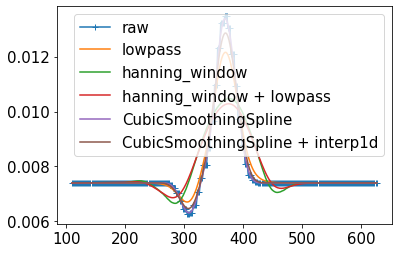

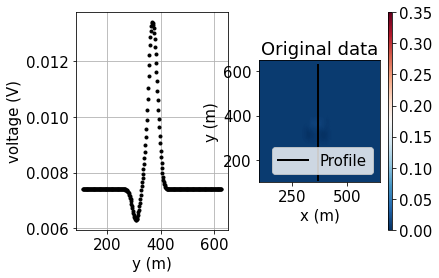

<Figure size 432x288 with 0 Axes>

In [5]:
xx, yy, distance, profile, ax,plt = pEXP.plot_line(Xs, Ys, U ,p1_s,p2_s, 
                                            interp=False,
                                            x_resolution = interp_size,
                                            smooth=smooth, 
                                            xaxis = x_axis,
                                            Vminmax=[0,0.35],
                                            limx=[100,650],
                                            limy=[100,650],
                                            showfig=True)
plt.savefig('profile' + savename + '.png', dpi=450)


As the potential field is scattered, the data are filtered given a choice of different algoritm. For this study, the CubicSmoothingSpline is selected

### Plot mirrored field

E:\Padova\Software\SourceInversion\Potential_field_imaging\dEXP_imaging\lib\plot_dEXP.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  vmin=mins, vmax=maxs)


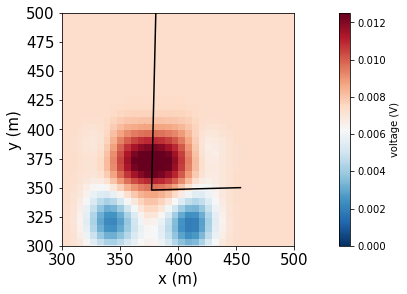

In [6]:
ax, plt = pEXP.plot_field(Xs,Ys,U, shape,Vminmax=[0,0.0125])
ax.plot(coords_liner_s[2:5,0],coords_liner_s[2:5,1],'k')
plt.axis('square')
plt.xlim(300,500)
plt.ylim(300,500)
plt.savefig('publi_mirror' + savename + '.png', dpi=450)


In [7]:
#%% ------------------------------- Pad the edges of grids

# xp,yp,U, shape = dEXP.pad_edges(xp,yp,U,shape,pad_type=0) # reflexion=5
# pEXP.plot_line(xp, yp,U,p1,p2, interp=interp)   

### Compute the derivatives
Uncomment to plot the derivatives

In [8]:
xderiv = transform.derivx(Xs, Ys, U, shape,order=0)
yderiv = transform.derivy(Xs, Ys, U, shape,order=0)
zderiv = transform.derivz(Xs, Ys, U, shape,order=0)

# interp = True
#pEXP.plot_line(Xs, Ys, xderiv ,p1_s,p2_s,title='xderiv',x_resolution= interp_size,
#                savefig=False, interp=interp, smooth=smooth,  Xaxis=x_axis)

#plt.savefig('xderiv' + savename + '.png', dpi=450)

#pEXP.plot_line(Xs, Ys, yderiv ,p1_s,p2_s,title='yderiv',x_resolution= interp_size,
#                savefig=False, interp=interp, smooth=smooth,  Xaxis=x_axis)

#plt.savefig('yderiv' + savename + '.png', dpi=450)

#pEXP.plot_line(Xs, Ys, zderiv ,p1_s,p2_s,title='zderiv',x_resolution= interp_size,
#                savefig=False, interp=interp, smooth=smooth,  Xaxis=x_axis)

#plt.savefig('zderiv' + savename + '.png', dpi=450)

### Upward continuation of the field data

E:\Padova\Software\SourceInversion\Potential_field_imaging\dEXP_imaging\fatiando\gravmag\transform.py:182: UserWarning: Using 'height' <= 0 means downward continuation, which is known to be unstable.
  warnings.warn("Using 'height' <= 0 means downward continuation, " +


[369.7078036686871]
[array([369.70780367, 110.22526131]), array([369.70780367, 626.30410108])]
need to rotate first?
paxis=[369.7078036686871]


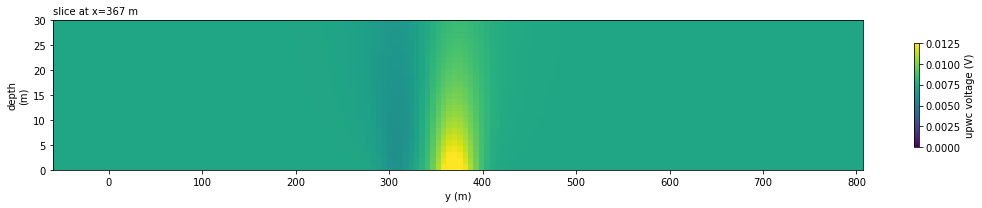

In [9]:
p = [p1_s,p2_s]

mesh, label_prop = dEXP.upwc(Xs, Ys, zp, U, shape, 
                  zmin=0, zmax=max_elevation, nlayers=nlay, 
                  qorder=qorder)

plt, cmap = pEXP.plot_xy(mesh, label=label_prop,Xaxis=x_axis,
                         Vminmax=[0,0.0125], p1p2=p)

cbar = plt.colorbar(cmap,shrink=0.7)
cbar.set_label('upwc voltage (V)')
plt.tight_layout()
plt.savefig('upwc voltage' + savename + '.png', dpi=450)

 ### DEXP ratio

[369.7078036686871]
[[369.70780367 110.22526131]
 [369.70780367 626.30410108]]
need to rotate first?
paxis=[369.7078036686871]
Markermax_z=10.799999999999999
Markermax_x=367.71203023085985


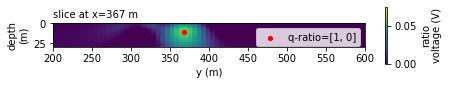

In [10]:
qratio = [1,0]
mesh_dexp, label_dexp = dEXP.dEXP_ratio(Xs, Ys, zp, U, shape, 
                  zmin=0, zmax=max_elevation, nlayers=nlay, 
                  qorders=qratio)
fig = plt.figure(figsize=(7,1.5))
ax = plt.gca()
plt, cmap = pEXP.plot_xy(mesh_dexp, label=label_dexp,
              markerMax=True,qratio=str(qratio),Vminmax=[0,0.075],
              p1p2=np.array([p1_s,p2_s]), ax=ax, Xaxis=x_axis,
              aspect_equal=True)

cbar = plt.colorbar(cmap,shrink=0.7)
cbar.set_label('ratio\nvoltage (V)')

plt.xlim([200,600])
plt.savefig('fig6_ratios_' + savename + '.png', dpi=450, bbox_inches = "tight")

### Ridges identification using the find_peaks algoritm
Put showfig=True to see the maximum identification

In [11]:
dEXP.ridges_minmax_plot(Xs, Ys, mesh, p1_s, p2_s,
                                      label=label_prop,
                                      interp=interp,x_resolution= interp_size,
                                      smooth=smooth,
                                      fix_peak_nb=2,
                                      method_peak='find_peaks',
                                      showfig=False,
                                      Xaxis=x_axis)  

D = dEXP.ridges_minmax(Xs, Ys, mesh, p1_s, p2_s,
                                      label=label_prop,
                                      method_peak='find_peaks',
                                      fix_peak_nb=2,
                                      returnAmp=True,
                                      showfig=False,
                                      Xaxis=x_axis,
                                      interp=interp,x_resolution= interp_size,
                                      smooth = smooth,
                                      qorder=qorder)  

dfI, dfII, dfIII =  D[0:3]
hI, hII, hIII  = D[3:6]
heights  = D[3:6]

### Plot ridges over continuated section

[369.7078036686871]
[array([369.70780367, 110.22526131]), array([369.70780367, 626.30410108])]
need to rotate first?
paxis=[369.7078036686871]


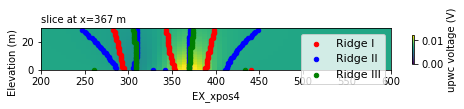

In [12]:
fig = plt.figure(figsize=(7,1.5))
ax = plt.gca()
plt, cmap = pEXP.plot_xy(mesh, label=label_prop, ax=ax, Xaxis=x_axis,
            Vminmax=[0,0.0125], p1p2=p)
cbar = plt.colorbar(cmap,shrink=0.7)
cbar.set_label('upwc voltage (V)')
plt.tight_layout()
pEXP.plot_ridges_harmonic(dfI,dfII,dfIII,ax=ax)
plt.xlim([200,600])
plt.savefig('ridges_raw_' + savename + '.png', dpi=450)

### filter ridges:
- spatially constrainsted in altitude and in longitude (x)
- minimum number of points forming a ridge = 5

dfI, dfII and dfIII are the dataframe for 

In [13]:
dfI_f,dfII_f, dfIII_f = dEXP.filter_ridges(dfI,dfII,dfIII,
                                            minDepth=minAlt_ridge, maxDepth=maxAlt_ridge,
                                            minlength=5,rmvNaN=True,
                                            xmin=100, xmax=700,
                                            Xaxis=x_axis)

df_f = dfI_f, dfII_f, dfIII_f

NaN or Inf detected - trying to remove


### plot ridges fitted over continuated section

[369.7078036686871]
[array([369.70780367, 110.22526131]), array([369.70780367, 626.30410108])]
need to rotate first?
paxis=[369.7078036686871]
-0.5310819035514363
oblique ridge type:0 / ridgenb:EX_xpos1
quartileSet: (281.96387186826655, 291.0254568476128)
------
0.3983114276635783
oblique ridge type:0 / ridgenb:EX_xpos2
quartileSet: (390.7028916204227, 399.76447659976895)
------
-0.26554095177571596
oblique ridge type:0 / ridgenb:EX_xpos3
quartileSet: (343.6689505371488, 347.5524869568686)
------
0.0
vertical ridge type:1 / ridgenb:EX_xpos1
1.9915571383178785
oblique ridge type:1 / ridgenb:EX_xpos2
quartileSet: (415.2986222786485, 454.13398647584705)
------
-1.9915571383178785
oblique ridge type:1 / ridgenb:EX_xpos3
quartileSet: (240.97098743789013, 279.80635163508884)
------
0.13277047588785798
oblique ridge type:1 / ridgenb:EX_xpos4
quartileSet: (367.833177148739, 371.71671356845883)
------
-0.26554095177571596
oblique ridge type:2 / ridgenb:EX_xpos1
quartileSet: (305.2650903865856, 

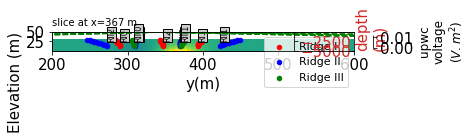

In [18]:
fig, ax1 = plt.subplots(figsize=(7,1.5))

plt, cmap = pEXP.plot_xy(mesh, label=label_prop, ax=ax1, Xaxis=x_axis,
              Vminmax=[0,0.0125], p1p2=p)
pEXP.plot_ridges_harmonic(dfI_f,dfII_f,dfIII_f,ax=ax1,label=True)

df_fit = dEXP.fit_ridges(df_f, rmvOutliers=True) # fit ridges on filtered data

ax2 = pEXP.plot_ridges_sources(df_fit, ax=ax1, z_max_source=-max_elevation*2,
                          ridge_type=[0,1,2],ridge_nb=None)


cbar = plt.colorbar(cmap,shrink=0.7)
cbar.set_label('upwc\nvoltage\n($V.m^2$)',fontsize=12)
plt.tight_layout()
#pEXP.plot_ridges_harmonic(dfI,dfII,dfIII,ax=ax1)
plt.xlim([200,600])
ax1.set_ylim([0,30])
ax2.set_ylim([-3000,0])

labels_ax1 = ax1.get_yticks() 
labels_ax1= labels_ax1[labels_ax1>0]

labels_ax2 = ax2.get_yticks() 
labels_ax2= labels_ax2[labels_ax2<0]

ax1.set_yticks(labels_ax1)
ax2.set_yticks(labels_ax2)
ax1.set_xlabel('y(m)')

# Adjust the plotting range of two y axes
org1 = 0.0  # Origin of first axis
org2 = 0.0  # Origin of second axis
pos = 0.5  # Position the two origins are aligned
align.yaxes(ax1, org1, ax2, org2, pos)

    
plt.savefig('fig6_geom_' + savename + '.png', dpi=450)